In [39]:
import xarray as xr
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import fsspec
from credit.regrid import Grid, ConservativeRegridder

%matplotlib inline

In [2]:
reanalysis = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr",
    chunks={"time": 48},
    consolidated=True,
)

/glade/derecho/scratch/dgagne/tmp/ipykernel_63746/1357041067.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  reanalysis = xr.open_zarr(


In [6]:
path = "https://storage.googleapis.com/gcp-public-data-arco-era5/raw/date-variable-single_level/2025/01/01/land_sea_mask/surface.nc"
with fsspec.open(path, mode="rb") as fid:
    lsm_2025 = xr.open_dataset(fid, engine="scipy", cache=False)

In [22]:
path = "https://storage.googleapis.com/gcp-public-data-arco-era5/raw/date-variable-single_level/1979/01/01/land_sea_mask/surface.nc"
with fsspec.open(path, mode="rb") as fid:
    lsm_1979 = xr.open_dataset(fid, engine="scipy", cache=False)

In [50]:
input_grid = Grid.from_degrees(
    lsm_2025.longitude.values, lsm_2025.latitude.values[::-1]
)
target_grid = Grid.from_degrees(grid.longitude.values, grid.latitude.values[::-1])

In [59]:
grid.latitude.values[::-1]

array([-89.78487691, -89.50620274, -89.22588285, -88.94519112,
       -88.66435834, -88.38345731, -88.10251814, -87.82155551,
       -87.54057743, -87.25958863, -86.97859211, -86.69758983,
       -86.41658314, -86.13557301, -85.85456012, -85.57354501,
       -85.29252808, -85.01150963, -84.7304899 , -84.44946909,
       -84.16844735, -83.88742482, -83.60640159, -83.32537776,
       -83.0443534 , -82.76332857, -82.48230332, -82.20127769,
       -81.92025174, -81.63922548, -81.35819896, -81.07717218,
       -80.79614519, -80.51511799, -80.23409061, -79.95306306,
       -79.67203535, -79.3910075 , -79.10997952, -78.82895141,
       -78.54792319, -78.26689487, -77.98586645, -77.70483793,
       -77.42380933, -77.14278066, -76.8617519 , -76.58072308,
       -76.2996942 , -76.01866525, -75.73763624, -75.45660718,
       -75.17557807, -74.89454891, -74.6135197 , -74.33249045,
       -74.05146116, -73.77043183, -73.48940246, -73.20837306,
       -72.92734362, -72.64631416, -72.36528466, -72.08

In [51]:
cr = ConservativeRegridder(input_grid, target_grid)

In [62]:
lsm_regrid = cr.regrid_dataset(lsm_2025.isel(time=slice(0, 1)))

In [93]:
lsm_regrid_re = lsm_regrid.transpose("time", "latitude", "longitude").isel(
    latitude=slice(None, None, -1)
)

In [92]:
lsm_regrid_re.lsm[:, ::-1]

<xarray.DataArray 'lsm' (time: 1, latitude: 640, longitude: 1280)> Size: 7MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-01
Dimensions without coordinates: latitude, longitude

In [69]:
grid["LSM"].shape

(1, 640, 1280)

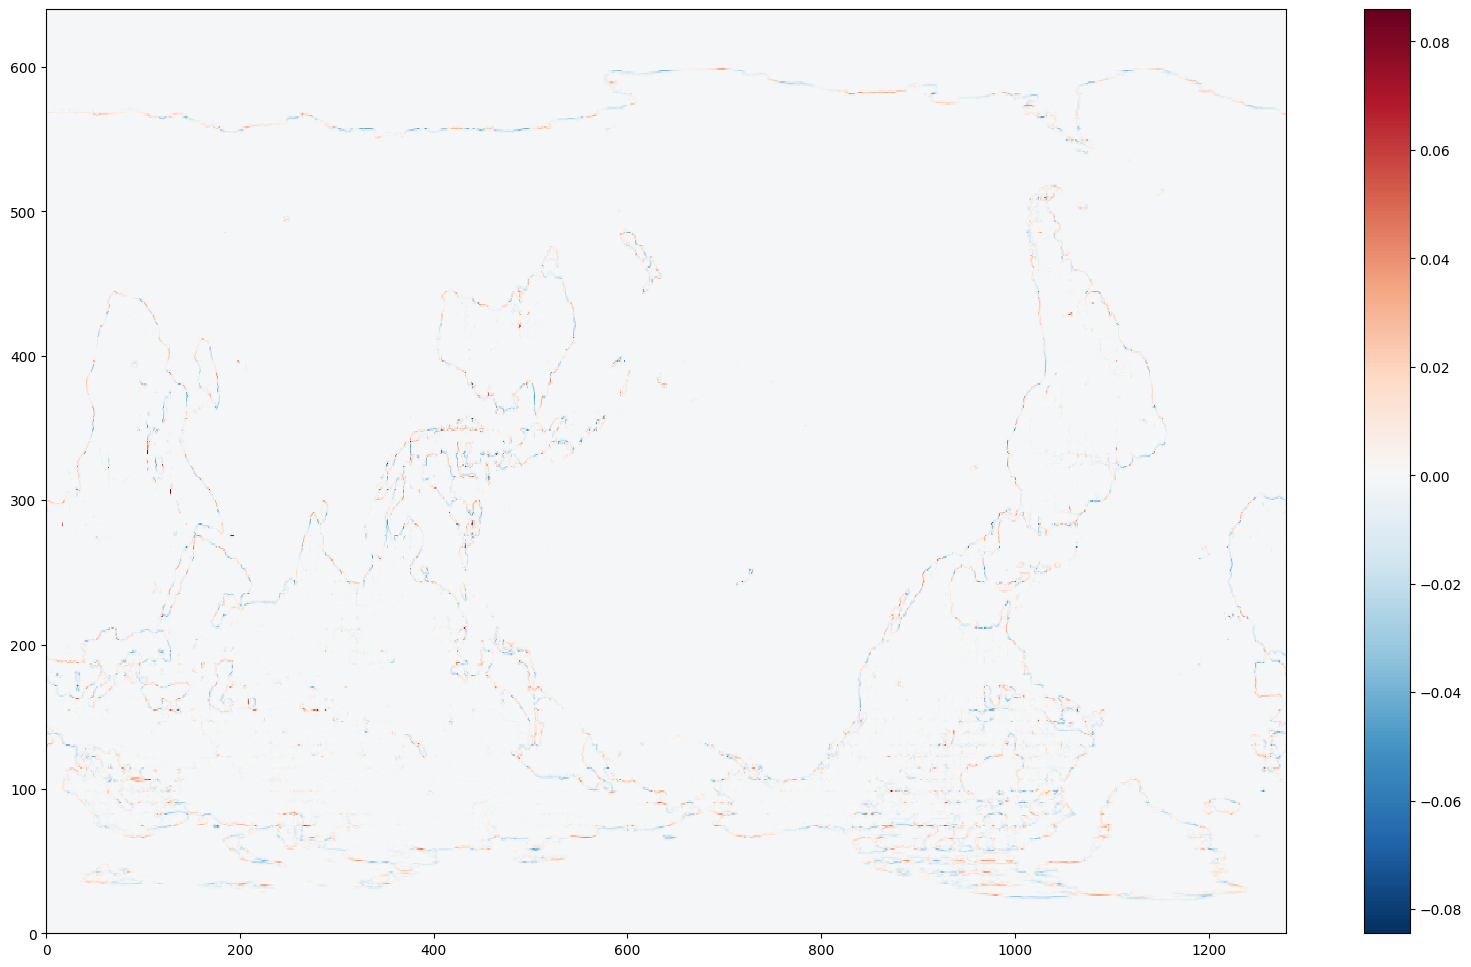

In [94]:
plt.figure(figsize=(20, 12))
plt.pcolormesh(lsm_regrid_re["lsm"][0].values - grid["LSM"][0].values, cmap="RdBu_r")
plt.colorbar()

In [53]:
lsm_2025.lsm[0].values[:, ::-1].shape

(721, 1440)

In [47]:
lsm_2025

<xarray.Dataset> Size: 199MB
Dimensions:    (longitude: 1440, latitude: 721, time: 24)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 192B 2025-01-01 ... 2025-01-01T23:00:00
Data variables:
    lsm        (time, latitude, longitude) float64 199MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2025-04-11 10:25:47 GMT by grib_to_netcdf-2.39.0: grib_to_n...

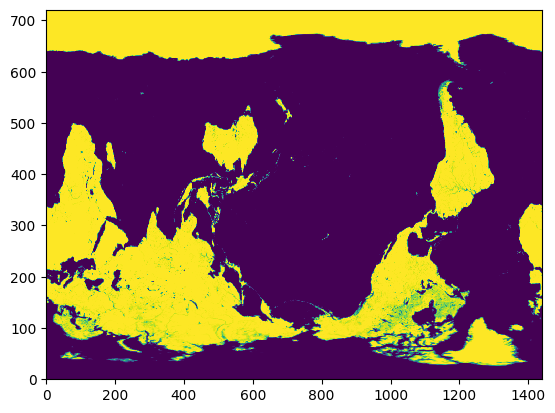

In [34]:
plt.pcolormesh(lsm_2025["lsm"].values[0])

0.0

In [30]:
lsm_1979["lsm"].values.shape

(24, 721, 1440)

In [8]:
rda_z = xr.open_dataset(
    "/glade/campaign/collections/rda/data/d633006/e5.oper.invariant/e5.oper.invariant.128_129_z.regn320sc.2016010100_2016010100.nc"
)

In [212]:
rda_z / 9.81

<xarray.Dataset> Size: 3MB
Dimensions:    (latitude: 640, longitude: 1280, time: 1)
Coordinates:
  * latitude   (latitude) float64 5kB 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * longitude  (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time       (time) datetime64[ns] 8B 2016-01-01
Data variables:
    Z          (time, latitude, longitude) float32 3MB 0.561 ... 2.772e+03
    utc_date   (time) float64 8B 2.055e+08
Attributes:
    DATA_SOURCE:          ECMWF: ERA5 GRIB 1 spherical harmonics (T639) and r...
    DATA_INTERPOLATION:   CISL RDA: ERA5 GRIB 1 N320/T639 data interpolated (...
    NETCDF_CONVERSION:    CISL RDA: Conversion from interpolated/synthesized ...
    NETCDF_VERSION:       4.3.0
    CONVERSION_PLATFORM:  Linux geyser09 2.6.32-358.el6.x86_64 #1 SMP Wed Nov...
    CONVERSION_DATE:      Fri Nov 10 14:31:40 MST 2017
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov 10 14:31:41 2017: ncks -4 --ppc default=7 e...
    NCO:                  4.6.9

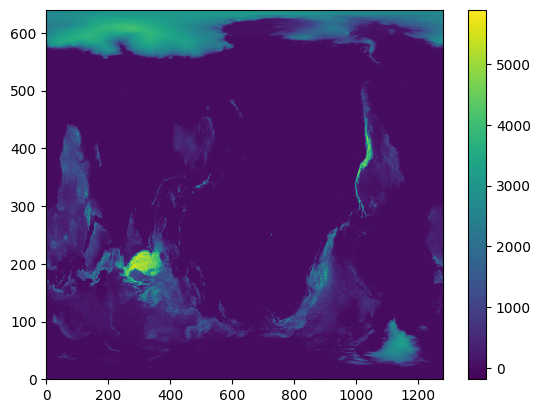

In [213]:
plt.pcolormesh(rda_z["Z"][0] / 9.81)
plt.colorbar()

In [108]:
z_scaled = (
    2 * (rda_z["Z"][0] - rda_z["Z"][0].min()) / (rda_z["Z"].max() - rda_z["Z"].min())
)

In [ ]:
rda_z["Z"]

In [123]:
z_scaled

<xarray.DataArray 'Z' (latitude: 640, longitude: 1280)> Size: 3MB
array([[0.06250439, 0.06250491, 0.06250543, ..., 0.06249824, 0.06250033,
        0.06250229],
       [0.06226708, 0.0622663 , 0.06226552, ..., 0.06228069, 0.06227624,
        0.06227166],
       [0.06198361, 0.06198701, 0.06199054, ..., 0.06199459, 0.06199093,
        0.06198727],
       ...,
       [0.95336545, 0.9535537 , 0.953742  , ..., 0.95297533, 0.95310533,
        0.9532354 ],
       [0.9653889 , 0.96554416, 0.9656996 , ..., 0.96507967, 0.9651827 ,
        0.96528584],
       [0.9729337 , 0.9730007 , 0.9730677 , ..., 0.9727663 , 0.972822  ,
        0.97287786]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 5kB 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * longitude  (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
    time       datetime64[ns] 8B 2016-01-01

In [134]:
static_norm_new = xr.merge(
    [z_scaled.drop_vars("time"), lsm_regrid_re["lsm"][0].drop_vars("time")]
)
static_norm_new = static_norm_new.rename({"Z": "Z_GDS4_SFC", "lsm": "LSM"})

In [147]:
static_norm_new["LSM"][:, 0]

<xarray.DataArray 'LSM' (latitude: 640)> Size: 5kB
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
...
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.93687162e-05, 1.31292581e-01,
       6.52975708e-01, 9.30571925e-01, 9.94710430e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99964327e-01,
       9.99874902e-01, 9.99954064e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])
Coordinates:
  * latitude   (latitude) float64 5kB 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
    longitude  float64 8B 0.0

In [135]:
static_norm_new.to_netcdf(
    "/glade/campaign/cisl/aiml/credit/static_scalers/static_norm_20250416.nc"
)

In [154]:
static_unscaled_new = xr.merge(
    [rda_z["Z"][0].drop_vars(["time"]), lsm_regrid_re["lsm"][0].drop_vars("time")]
)
static_unscaled_new = static_unscaled_new.rename({"Z": "Z_GDS4_SFC", "lsm": "LSM"})

In [155]:
static_unscaled_new

<xarray.Dataset> Size: 10MB
Dimensions:     (latitude: 640, longitude: 1280)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
Data variables:
    Z_GDS4_SFC  (latitude, longitude) float32 3MB 5.504 5.519 ... 2.719e+04
    LSM         (latitude, longitude) float64 7MB 0.0 0.0 0.0 ... 1.0 1.0 1.0
Attributes: (12/13)
    long_name:                     Geopotential (at the surface)
    short_name:                    z
    units:                         m**2 s**-2
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               129
    ...                            ...
    original_data_representation:  Reduced Gaussian grid (N320)
    rda_dataset:                   ds630.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds630.0/
    rda_dataset_doi:               DOI: 10.5065/D6X34W69
    rda_dataset_group:             ERA5 atmospheric invariant fields
    number_of_significant_digits:  7

In [140]:
static_unscaled_new

<xarray.Dataset> Size: 10MB
Dimensions:     (time: 1, latitude: 640, longitude: 1280)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
Dimensions without coordinates: time
Data variables:
    Z_GDS4_SFC  (time, latitude, longitude) float32 3MB 5.504 ... 2.719e+04
    LSM         (latitude, longitude) float64 7MB 0.0 0.0 0.0 ... 1.0 1.0 1.0
Attributes:
    DATA_SOURCE:          ECMWF: ERA5 GRIB 1 spherical harmonics (T639) and r...
    DATA_INTERPOLATION:   CISL RDA: ERA5 GRIB 1 N320/T639 data interpolated (...
    NETCDF_CONVERSION:    CISL RDA: Conversion from interpolated/synthesized ...
    NETCDF_VERSION:       4.3.0
    CONVERSION_PLATFORM:  Linux geyser09 2.6.32-358.el6.x86_64 #1 SMP Wed Nov...
    CONVERSION_DATE:      Fri Nov 10 14:31:40 MST 2017
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov 10 14:31:41 2017: ncks -4 --ppc default=7 e...
    NCO:                  4.6.9

In [156]:
static_unscaled_new.to_netcdf(
    "/glade/campaign/cisl/aiml/credit/static_scalers/static_whole_20250416.nc"
)

In [111]:
sn_old

<xarray.Dataset> Size: 10MB
Dimensions:     (latitude: 640, longitude: 1280)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
Data variables:
    Z_GDS4_SFC  (latitude, longitude) float64 7MB 0.06226 0.06226 ... 0.06226
    LSM         (latitude, longitude) float32 3MB ...
Attributes:
    variables:  Geopotential relative to the mean sea level (Z_GDS4_SFC); Lan...

In [100]:
sn_old = xr.open_dataset(
    "/glade/campaign/cisl/aiml/credit/static_scalers/static_norm_old.nc"
)

In [103]:
sn_old["Z_GDS4_SFC"].min()

<xarray.DataArray 'Z_GDS4_SFC' ()> Size: 8B
array(0.)

In [3]:
def mirror_point_at_360(ds):
    extra_point = ds.where(ds.longitude == 0, drop=True).assign_coords(
        longitude=lambda x: x.longitude + 360
    )
    return xr.concat([ds, extra_point], dim="values")


def build_triangulation(x, y):
    grid = np.stack([x, y], axis=1)
    return Delaunay(grid)

In [43]:
grid = xr.open_dataset(
    "/glade/campaign/cisl/aiml/credit/static_scalers/LSM_static_variables_ERA5_zhght.nc"
)

/glade/derecho/scratch/dgagne/tmp/ipykernel_63746/3762855237.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  grid = xr.open_dataset(


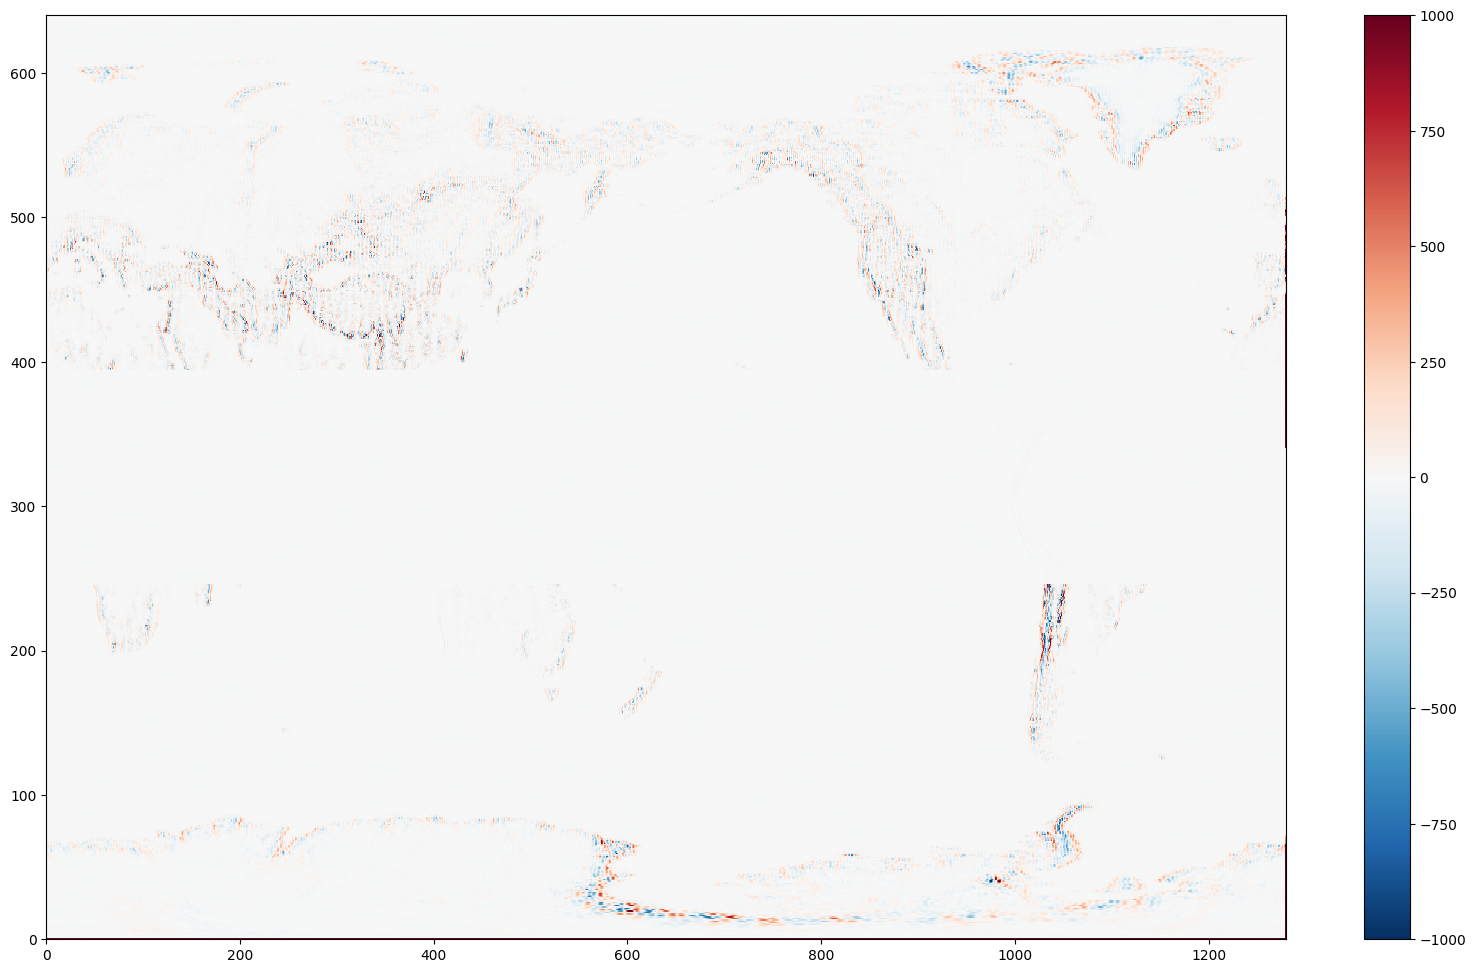

In [21]:
plt.figure(figsize=(20, 12))
plt.pcolormesh(
    (rda_z["Z"][0] - grid["Z_GDS4_SFC"])[::-1], vmin=-1000, vmax=1000, cmap="RdBu_r"
)
plt.colorbar()

In [5]:
lon_f = grid["longitude"].values
lat_f = grid["latitude"].values
mesh = np.stack(np.meshgrid(lon_f, lat_f, indexing="ij"), axis=-1)

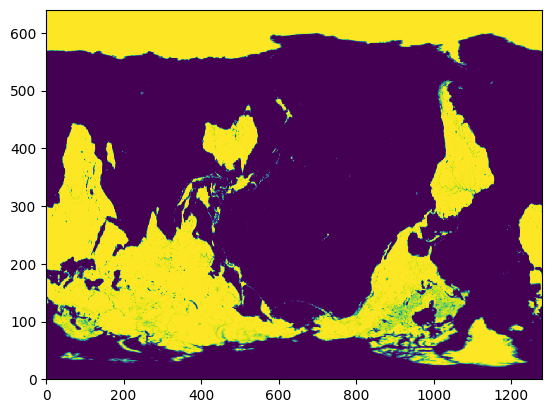

In [32]:
plt.pcolormesh(grid["LSM"][0])

In [6]:
ds_feb20 = (
    reanalysis.sel(time=slice("2020-02-01", "2020-02-02"))
    .compute()
    .pipe(mirror_point_at_360)
)

In [7]:
lon = ds_feb20["longitude"].values
lat = ds_feb20["latitude"].values
tri = build_triangulation(lon, lat)

In [8]:
indices = tri.find_simplex(mesh)

In [9]:
ndim = tri.transform.shape[-1]
T_inv = tri.transform[indices, :ndim, :]
r = tri.transform[indices, ndim, :]
c = np.einsum("...ij,...j", T_inv, mesh - r)

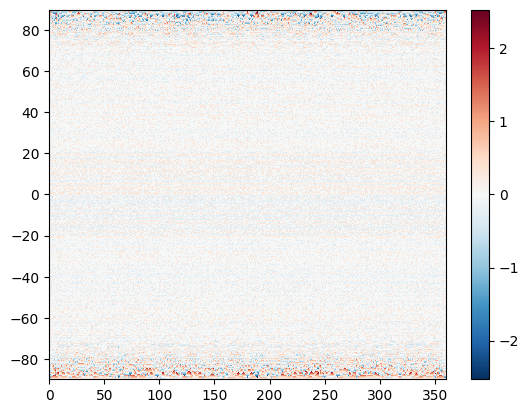

In [11]:
plt.pcolormesh(lon_f, lat_f, (mesh - r)[:, :, 1].T, cmap="RdBu_r")
plt.colorbar()

In [143]:
c.min()

np.float64(-8.881784197001252e-16)

In [48]:
c2 = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)

In [50]:
c2.shape

(1280, 640, 4)

In [21]:
ds_feb20

<xarray.Dataset> Size: 4GB
Dimensions:              (time: 48, values: 542720)
Coordinates:
    depthBelowLandLayer  float64 8B 100.0
    entireAtmosphere     float64 8B 0.0
    latitude             (values) float64 4MB 89.78 89.78 ... -89.51 -89.78
    longitude            (values) float64 4MB 0.0 20.0 40.0 ... 360.0 360.0
    number               int64 8B 0
    step                 timedelta64[ns] 8B 00:00:00
    surface              float64 8B 0.0
  * time                 (time) datetime64[ns] 384B 2020-02-01 ... 2020-02-02...
    valid_time           (time) datetime64[ns] 384B 2020-02-01 ... 2020-02-02...
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 104MB 0.375 0.5 ... 0.25 0.375
    d2m                  (time, values) float32 104MB 238.3 238.3 ... 238.5
    hcc                  (time, values) float32 104MB 0.0 0.0 0.0 ... 0.0 0.0
    istl1                (time, values) float32 104MB 243.4 243.5 ... 271.5
    istl2                (time, values) float32 104MB 245.9 246.0 ... 271.5
    istl3                (time, values) float32 104MB 254.2 254.2 ... 271.5
    ...                   ...
    tsn                  (time, values) float32 104MB 243.4 243.5 ... 238.6
    u10                  (time, values) float32 104MB 9.284 5.951 ... -3.308
    u100                 (time, values) float32 104MB 11.01 6.901 ... -4.022
    v10                  (time, values) float32 104MB -8.271 -11.09 ... -4.534
    v100                 (time, values) float32 104MB -10.32 -13.66 ... -7.963
    z                    (time, values) float32 104MB 5.504 6.609 ... 2.719e+04
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

In [13]:
data = ds_feb20["z"].values

In [14]:
c = np.einsum("...ij,...j", T_inv, mesh - r)
c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
result = np.einsum("...i,...i", data[:, tri.simplices[indices]], c)

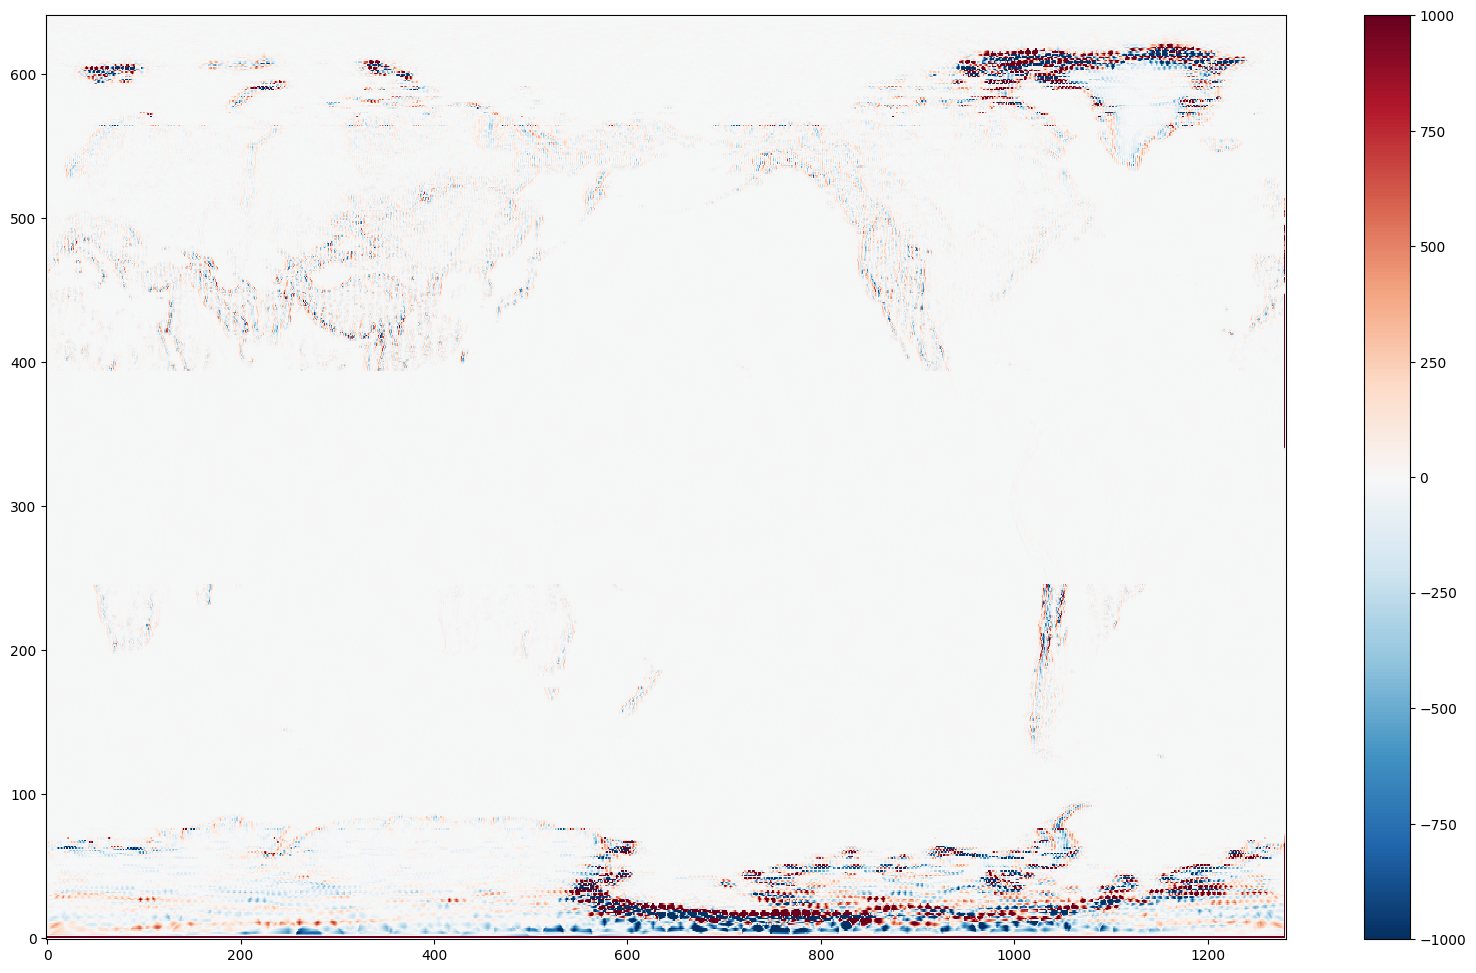

In [15]:
plt.figure(figsize=(20, 12))
plt.pcolormesh(
    (result[0].T - grid["Z_GDS4_SFC"])[::-1], cmap="RdBu_r", vmin=-1000, vmax=1000
)
plt.colorbar()
plt.ylim(-1, 641)
plt.xlim(-1, 1281)
plt.savefig("terrain_interp_errors.png", dpi=300, bbox_inches="tight")

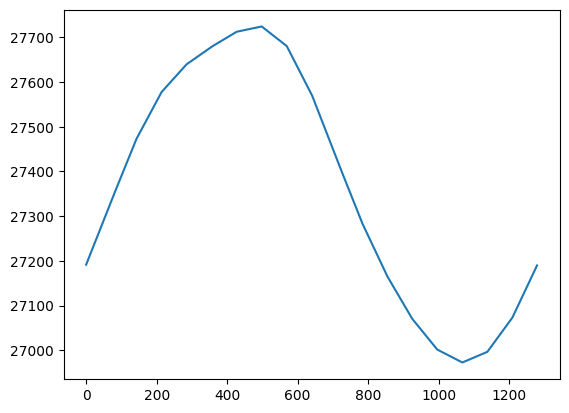

In [94]:
plt.plot(result[0].T[-1] - grid["Z_GDS4_SFC"][-1].values)

In [80]:
grid["Z_GDS4_SFC"][-1].values

array([0., 0., 0., ..., 0., 0., 0.], shape=(1280,))

In [ ]:
def interpolate(data, tri, mesh):
    indices = tri.find_simplex(mesh)
    ndim = tri.transform.shape[-1]
    T_inv = tri.transform[indices, :ndim, :]
    r = tri.transform[indices, ndim, :]
    c = np.einsum("...ij,...j", T_inv, mesh - r)
    c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
    result = np.einsum("...i,...i", data[:, tri.simplices[indices]], c)
    return np.where(indices == -1, np.nan, result)

In [7]:
def lonlat_to_cartesian(lon, lat, radius=6371.229):
    x = radius * np.cos(np.radians(lon)) * np.cos(np.radians(lat))
    y = radius * np.cos(np.radians(lat)) * np.sin(np.radians(lon))
    z = radius * np.sin(np.radians(lat))
    return x, y, z


def interpolate_3d(data, tri_3d, mesh):
    return

In [8]:
x, y, z = lonlat_to_cartesian(lon, lat)

NameError: name 'lon' is not defined

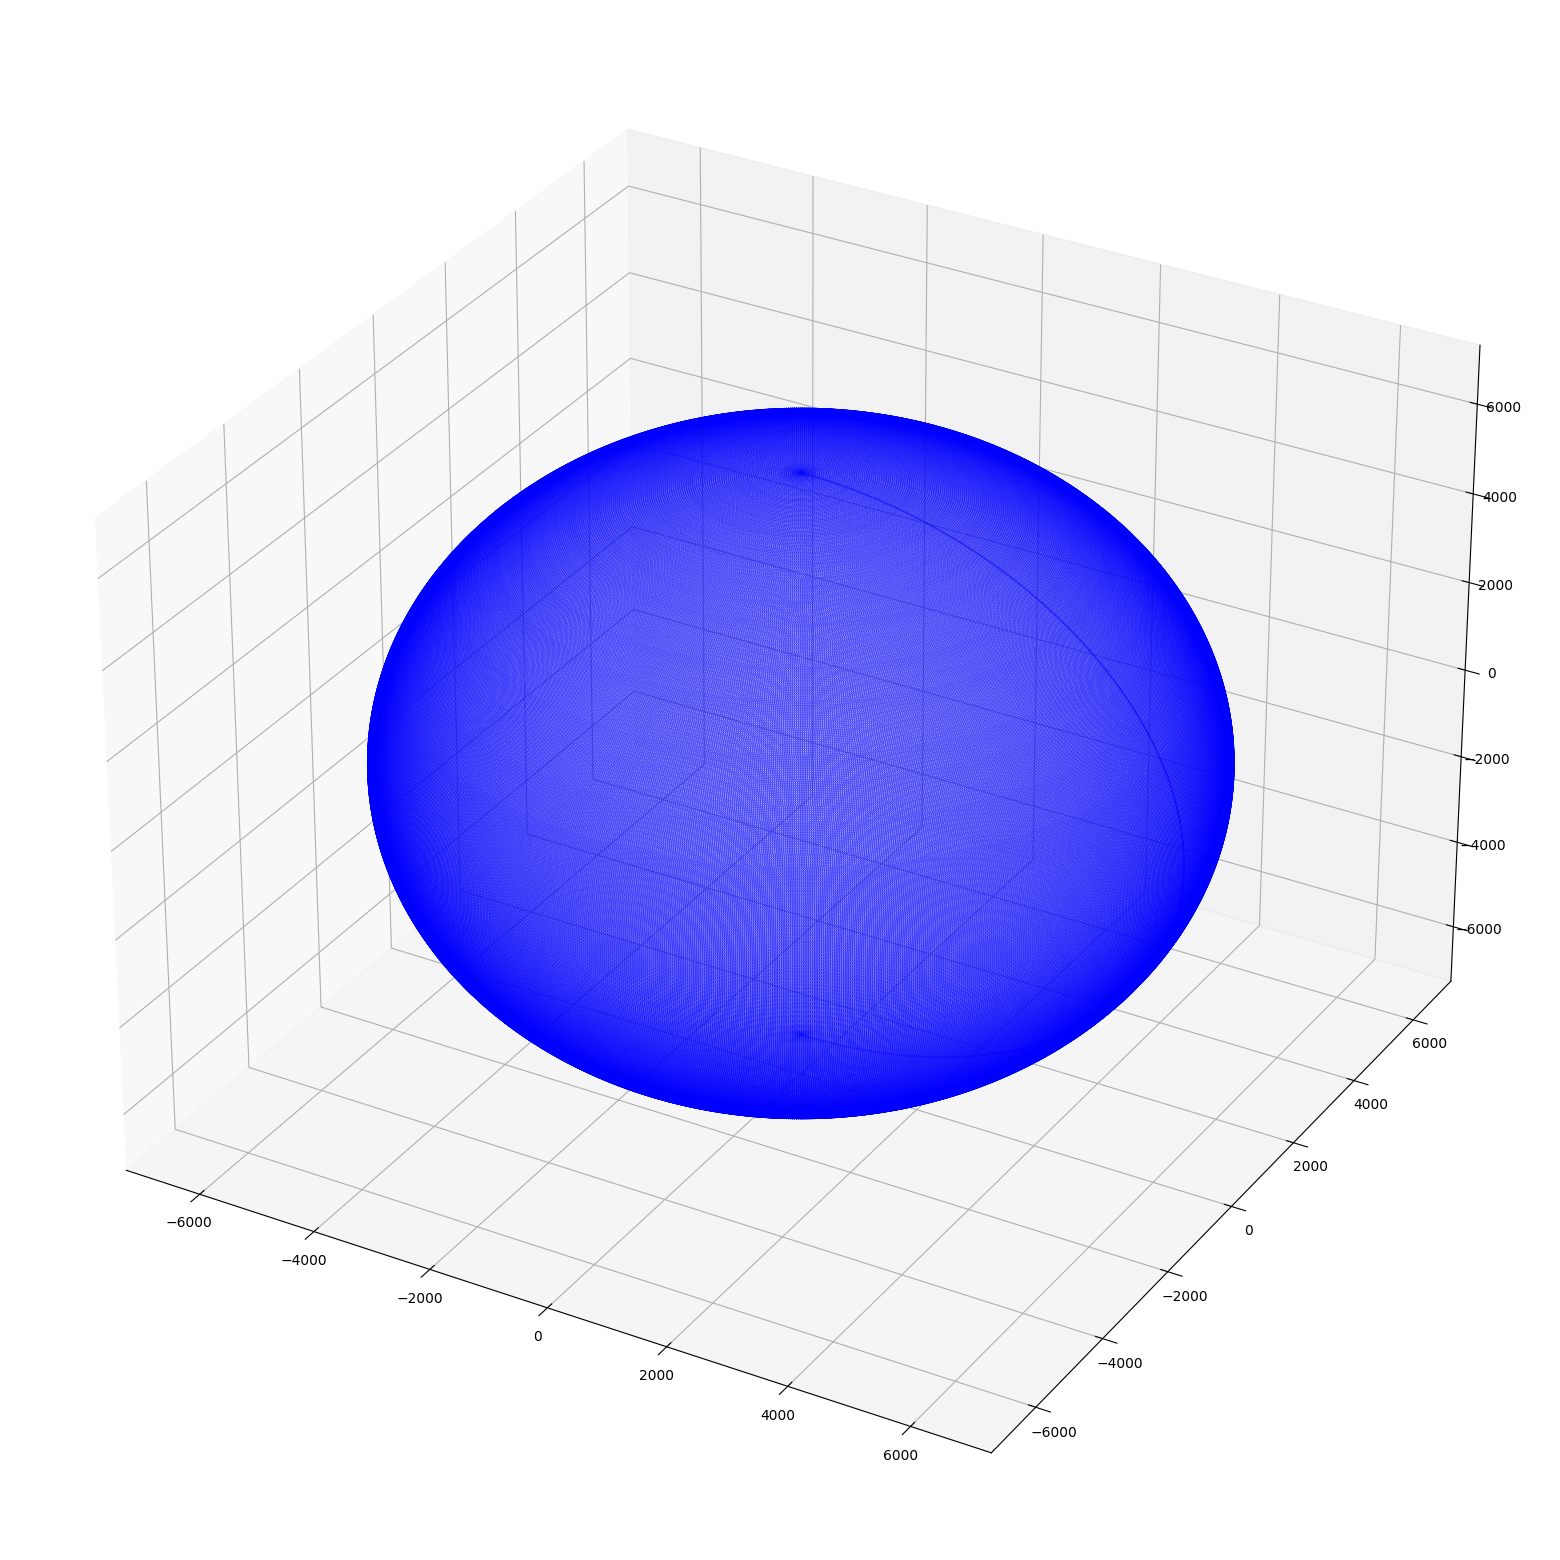

In [149]:
ax = plt.figure(figsize=(20, 20)).add_subplot(projection="3d")
ax.scatter(x, y, zs=z, s=0.1, c="b")

In [ ]:
lon_3d = reanalysis.longitude.values
lat_3d = reanalysis.latitude.values
x, y, z = lonlat_to_cartesian(lon_3d, lat_3d)


def build_triangulation_3d(x, y, z):
    grid = np.stack([x, y, z], axis=1)
    return Delaunay(grid)


tri_3d = build_triangulation_3d(x, y, z)

In [ ]:
tri_3d

In [141]:
grid

<xarray.Dataset> Size: 20MB
Dimensions:              (latitude: 640, longitude: 1280, time: 1)
Coordinates:
  * latitude             (latitude) float64 5kB 89.78 89.51 ... -89.51 -89.78
  * longitude            (longitude) float64 10kB 0.0 0.2812 ... 359.4 359.7
  * time                 (time) datetime64[ns] 8B 1950-01-01
    initial_time0_hours  datetime64[ns] 8B ...
    forecast_time1       timedelta64[ns] 8B ...
Data variables:
    SP                   (latitude, longitude) float32 3MB ...
    utc_date             int32 4B ...
    weight               (latitude) float64 5kB ...
    zero                 (latitude) float64 5kB ...
    Z_GDS4_SFC           (latitude, longitude) float64 7MB ...
    coslat               (latitude, longitude) float64 7MB ...
    LSM                  (time, latitude, longitude) float32 3MB ...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r1i...
    CONVERSION_AND_COMPRESSION_DATE:        Sun Jan 15 04:56:56 MST 2023
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Sun Jan 15 04:56:58 2023: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [188]:
ds = xr.open_dataset(
    "/glade/derecho/scratch/dgagne/CREDIT/RAW_OUTPUT/wxformer_6h_test/2020-05-01T00Z/pred_2020-05-01T00Z_006.nc"
)

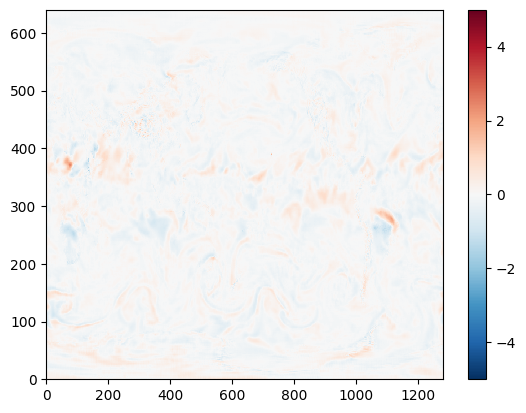

In [205]:
plt.pcolormesh(
    (ds["T_PRES"][0, 3, ::-1] - ds["T500"][0, ::-1]), vmin=-5, vmax=5, cmap="RdBu_r"
)
plt.colorbar()

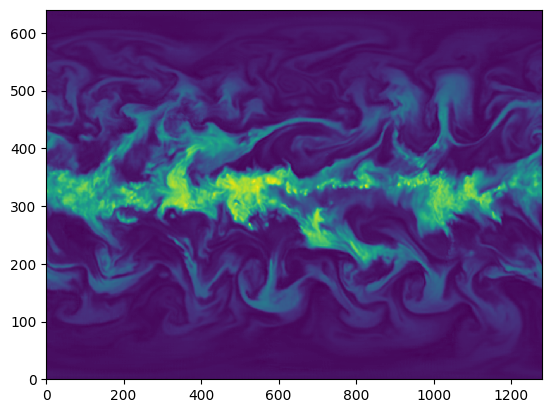

In [207]:
plt.pcolormesh(ds["Q500"][0, ::-1])

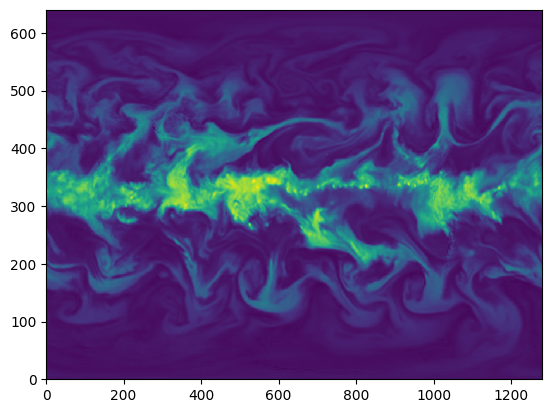

In [206]:
plt.pcolormesh(ds["Q_PRES"][0, 3, ::-1])

In [199]:
ds["Z500"][0].min()

<xarray.DataArray 'Z500' ()> Size: 4B
array(46779.043, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2020-05-01T06:00:00

In [198]:
ds["Z_PRES"][0, 3].min()

<xarray.DataArray 'Z_PRES' ()> Size: 8B
array(47406.15574879)
Coordinates:
    time      datetime64[ns] 8B 2020-05-01T06:00:00
    pressure  float64 8B 500.0

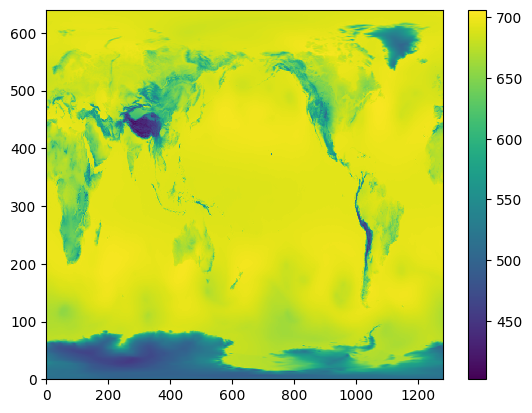

In [230]:
plt.pcolormesh(ds["P"][0, 10, ::-1] / 100)
plt.colorbar()

In [242]:
from credit.interp import (
    interp_hybrid_to_pressure_levels,
    interp_geopotential_to_pressure_levels,
)

In [269]:
z_interp = interp_hybrid_to_pressure_levels(
    ds["Z"][0].values,
    ds["P"][0].values / 100.0,
    np.array([250.0, 500.0]),
    use_log=False,
)

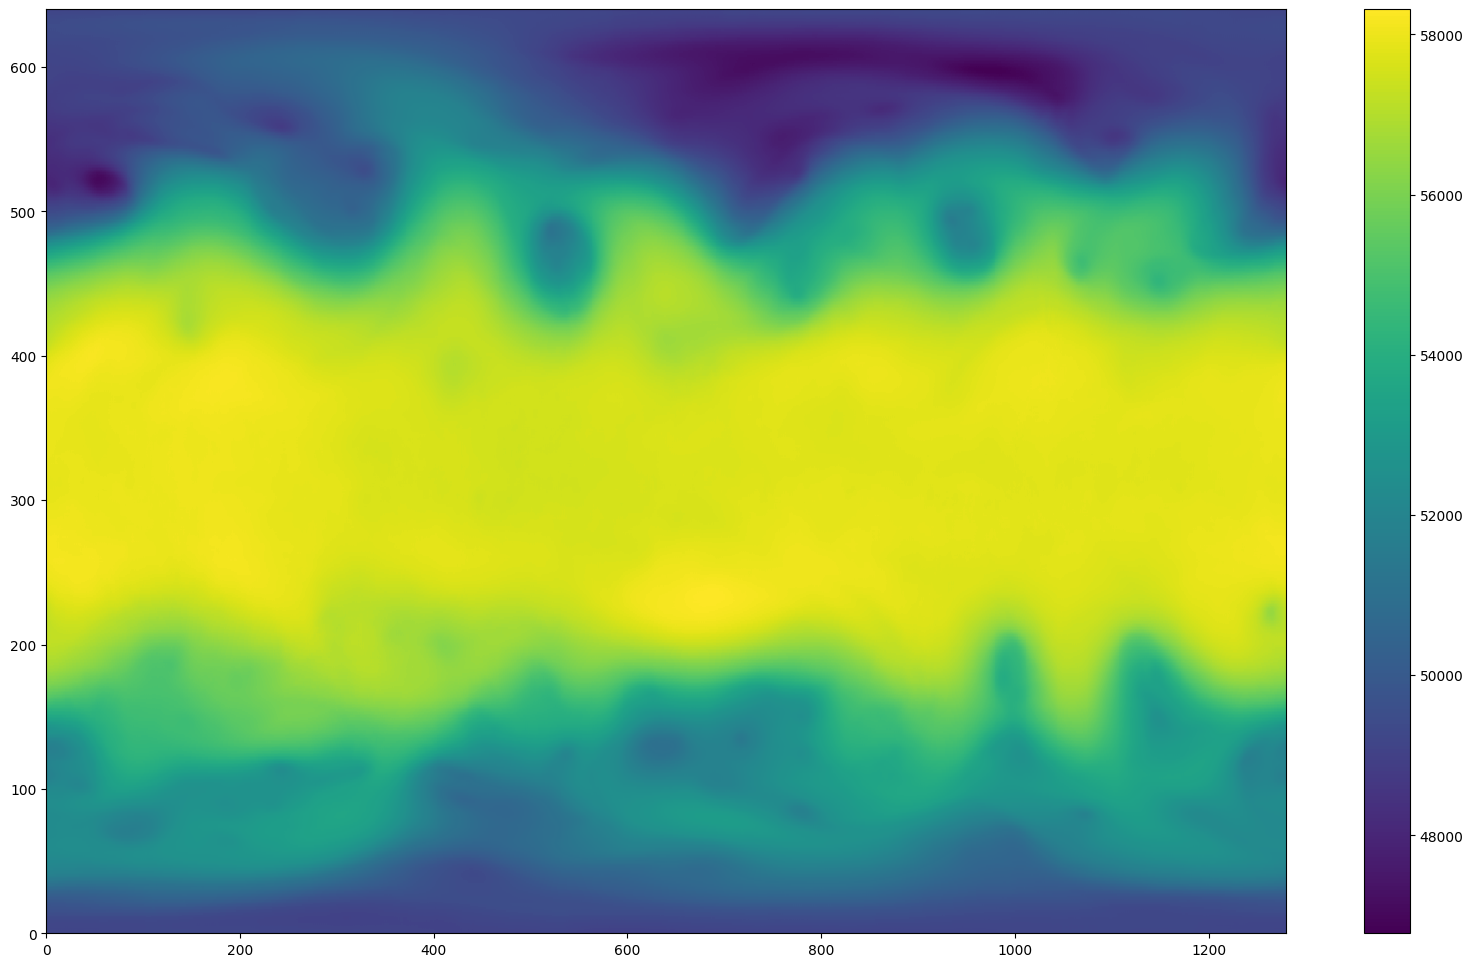

In [291]:
plt.figure(figsize=(20, 12))
plt.pcolormesh(ds["Z500"][0].values)
plt.colorbar()

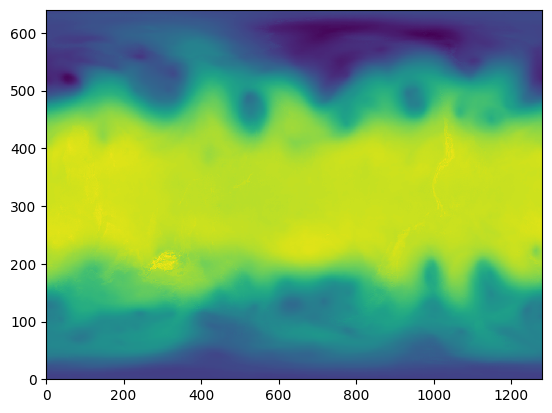

In [293]:
plt.pcolormesh(ds["Z_PRES"][0, 3].values)

In [288]:
np.unravel_index(
    np.argmax(ds["Z_PRES"][0, 3].values - ds["Z500"][0].values), ds["Z500"][0].shape
)

(210, 292)

In [294]:
np.max(ds["Z_PRES"][0, 3].values - ds["Z500"][0].values)

2317.1065546457394

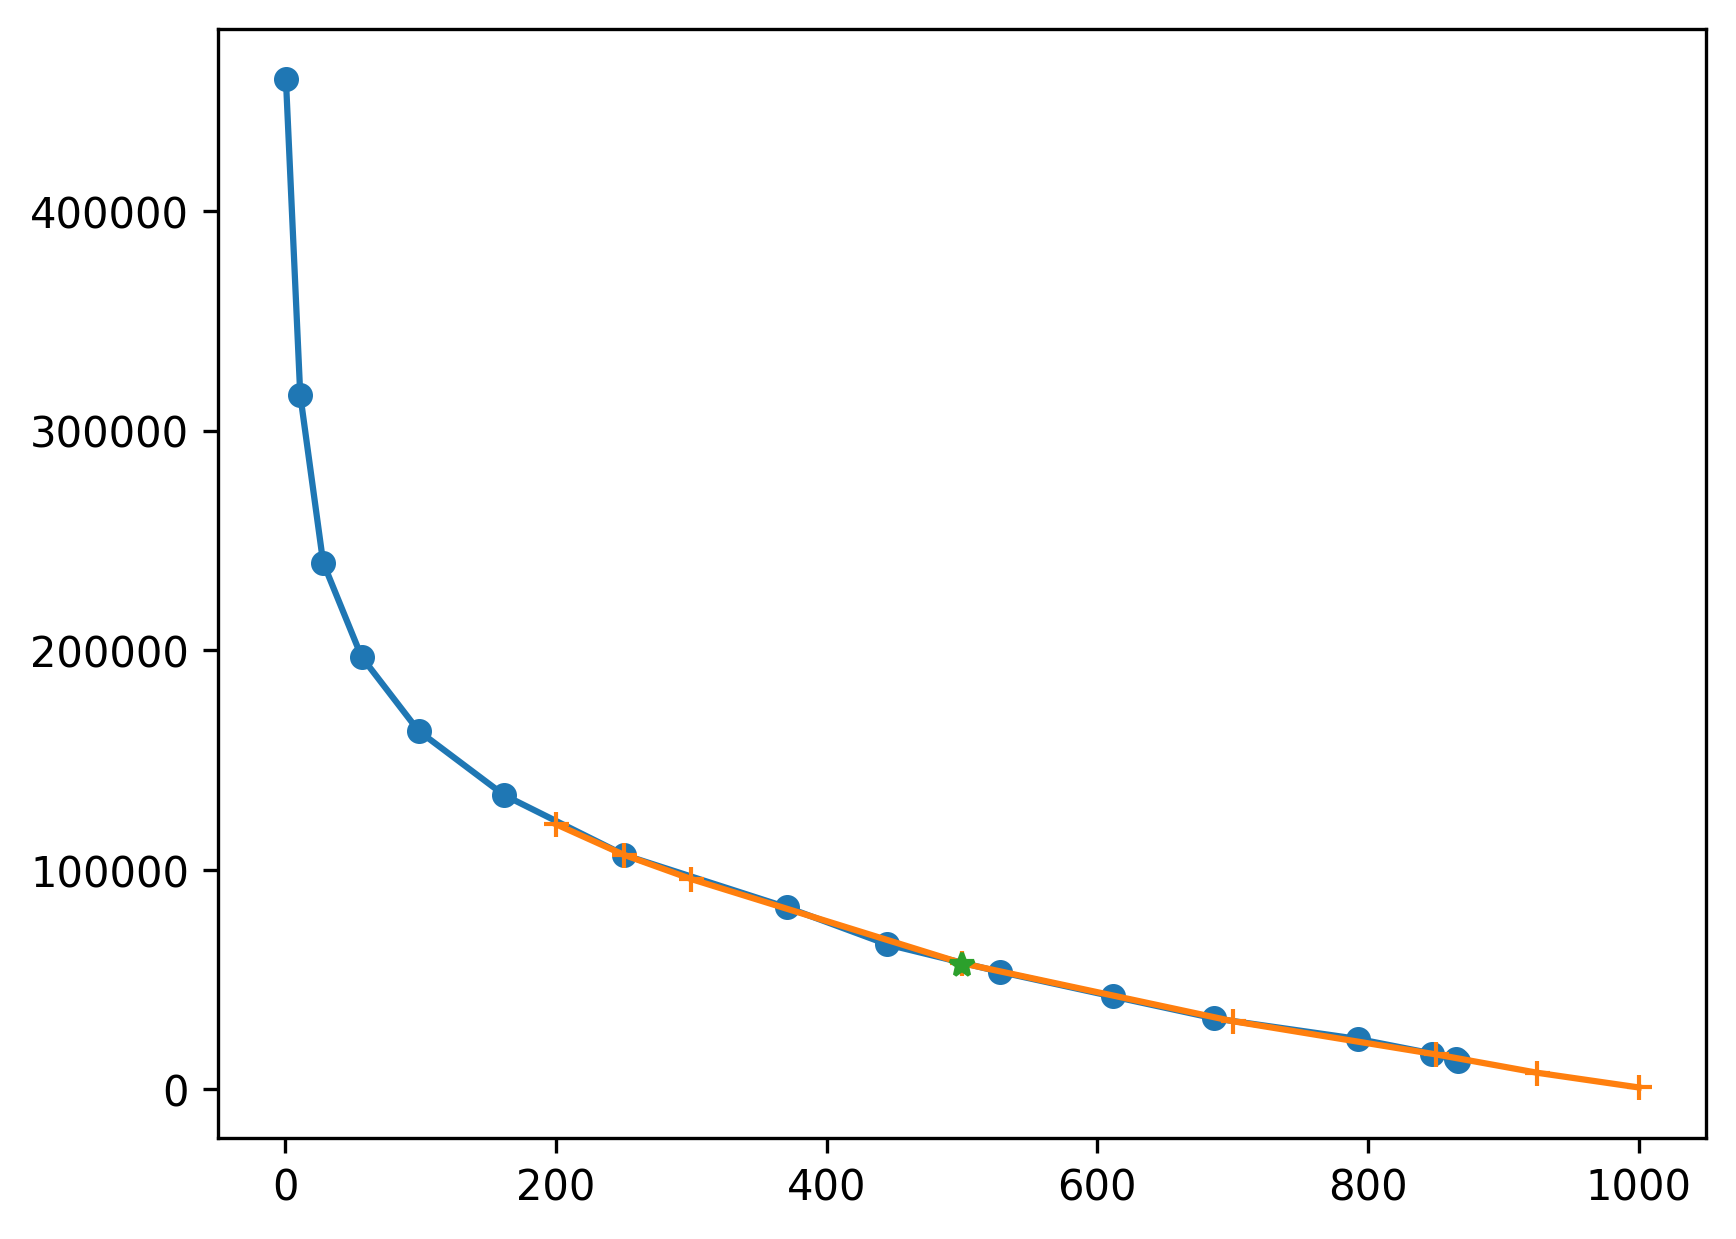

In [306]:
i = 198
j = 210
plt.figure(dpi=300)
plt.plot(ds["P"][0, :, i, j] / 100, ds["Z"][0, :, i, j], marker="o", ms=5)
plt.plot(ds["pressure"], ds["Z_PRES"][0, :, i, j], marker="+")
plt.plot(500, ds["Z500"][0, i, j], marker="*")
# plt.xlim(400, 600)
# plt.ylim(40000, 70000)

(1013.0, 100)

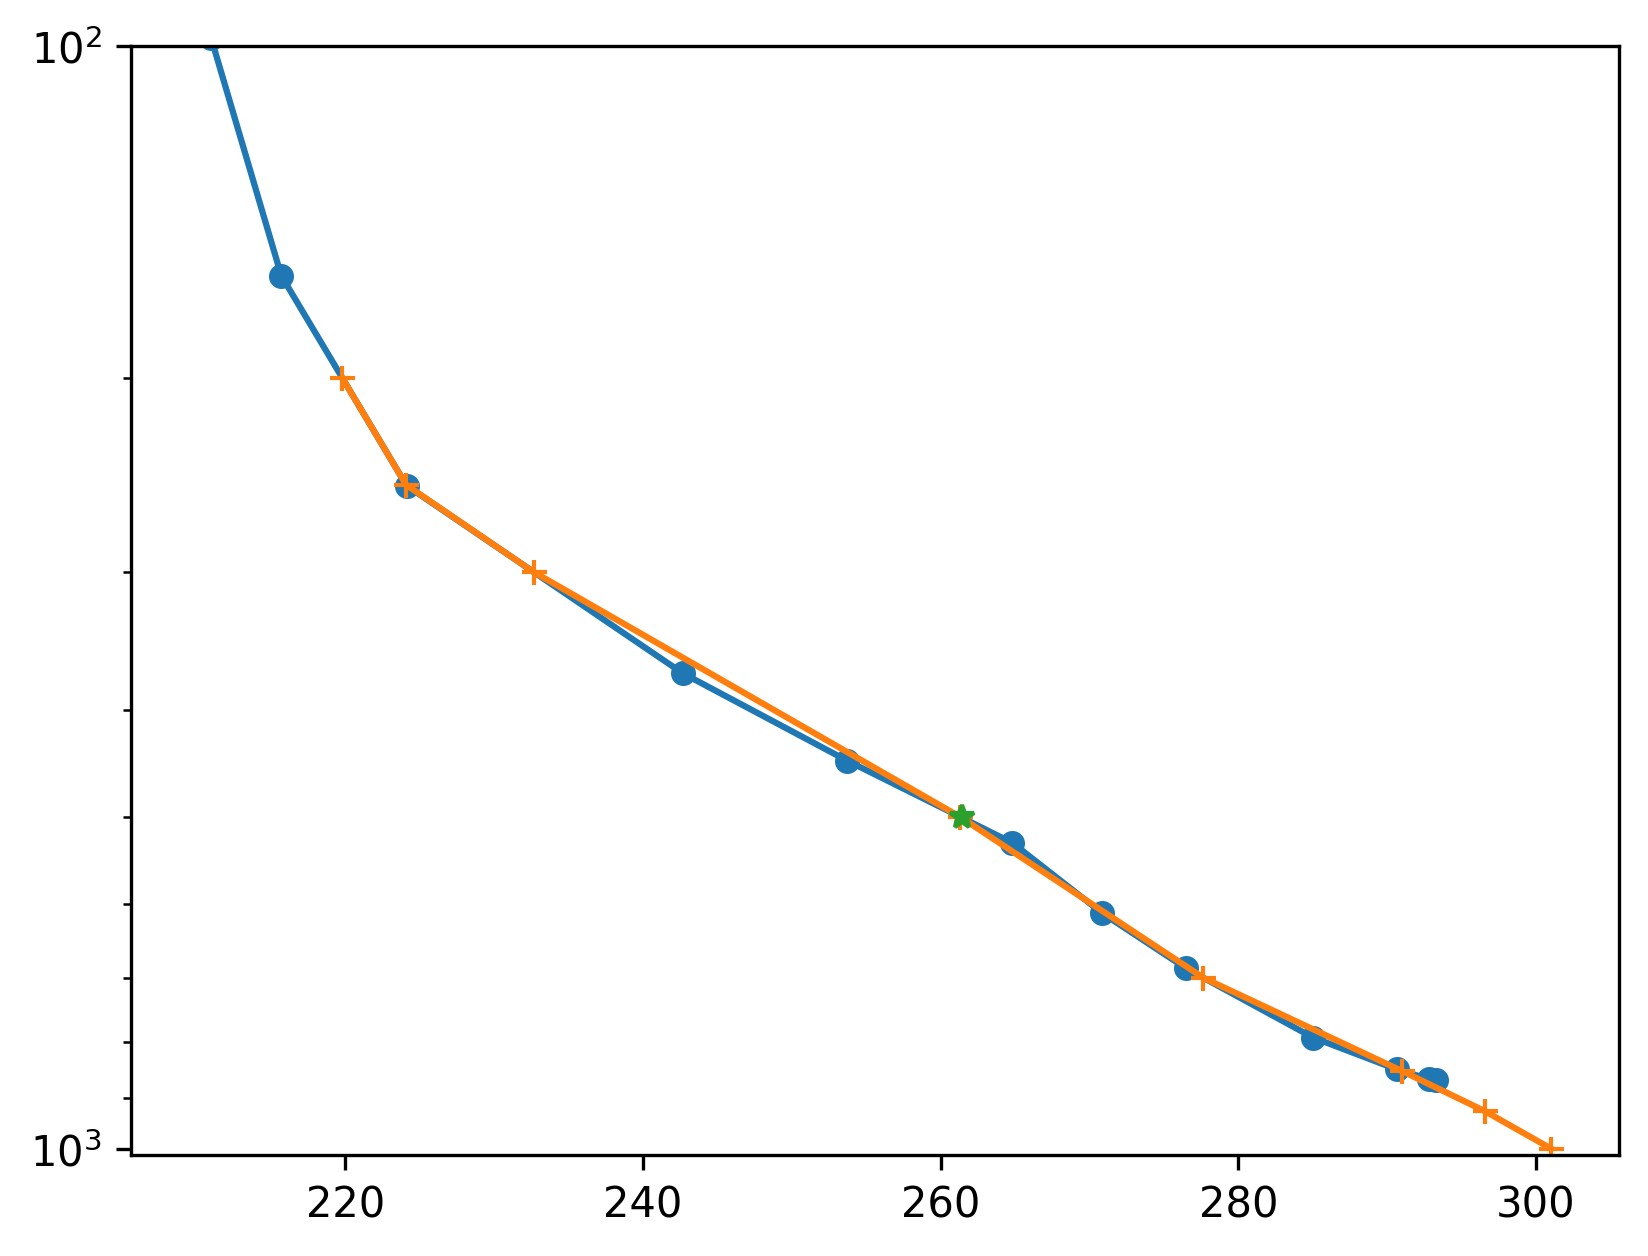

In [316]:
plt.figure(dpi=300)
plt.plot(ds["T"][0, :, i, j], ds["P"][0, :, i, j] / 100, marker="o", ms=5)
plt.plot(ds["T_PRES"][0, :, i, j], ds["pressure"], marker="+")
plt.plot(ds["T500"][0, i, j], 500, marker="*")
plt.gca().invert_yaxis()
plt.gca().set_yscale("log")
plt.ylim(1013.0, 100)

In [248]:
np.unravel_index(np.argmax(z_interp[1] - ds["Z_PRES"][0, 3].values), z_interp[1].shape)

(194, 288)

In [251]:
np.max(z_interp[1] - ds["Z_PRES"][0, 3].values)

778.7522392346291

In [238]:
z_interp.shape

(2, 640, 1280)

In [254]:
zg_interp = interp_geopotential_to_pressure_levels(
    ds["Z"][0].values,
    ds["P"][0].values,
    np.array([50000.0]),
    ds["SP"][0].values,
    rda_z["Z"][0].values,
    ds["T"][0].values,
)

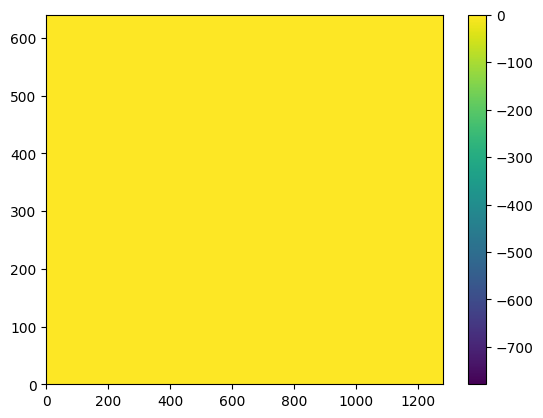

In [260]:
plt.pcolormesh(zg_interp[0] - z_interp[1])
plt.colorbar()

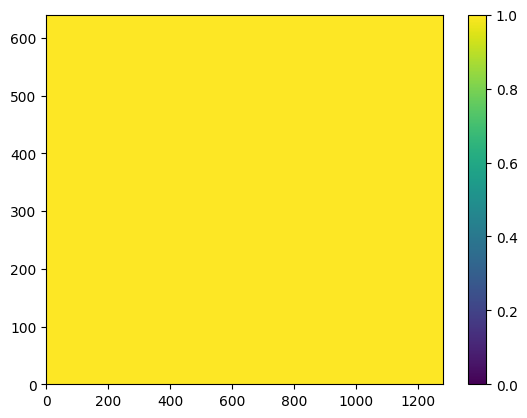

In [265]:
plt.pcolormesh(ds["SP"][0].values > 50000)
plt.colorbar()

In [268]:
np.count_nonzero(ds["SP"][0].values < 50000.0)

1

In [ ]:
/glade/derecho/scratch/ksha/CREDIT_data/ERA5_mlevel_arXiv/SixHourly_y_TOTAL